<a href="https://colab.research.google.com/github/corrine1106/Project_EDA/blob/master/LTV_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# pd.set_option('display.float_format',lambda x: '%.2f'%x)

In [2]:
customer_value = pd.read_csv('/content/drive/MyDrive/T大使/df_RFM.csv',index_col= 0)

In [3]:
customer_value.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9.100002e+12,123,3,23,2,268088.0,2,7,High-value
1,9.100003e+12,16,3,25,2,276824.0,2,7,High-value
2,9.100002e+12,61,3,20,2,197248.0,2,7,High-value
3,9.100002e+12,18,3,20,2,235864.0,2,7,High-value
4,9.100001e+12,68,3,24,2,255800.0,2,7,High-value


In [4]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# customer_value['Segment'] = labelencoder.fit_transform(customer_value['Segment'])
# customer_value.head()

In [5]:
# labelencoder.classes_

In [6]:
transform = {'High-value':2, 'Low-value':0, 'Mid-value':1}

In [7]:
customer_value['Segment'] = customer_value['Segment'].apply(lambda x:transform[x])

In [8]:
corr_matrix = customer_value.corr()

In [9]:
corr_matrix['Segment'].sort_values(ascending=False)

Segment             1.000000
OverallScore        0.923148
FrequencyCluster    0.816918
RevenueCluster      0.802189
Frequency           0.797928
Revenue             0.760407
RecencyCluster      0.741890
CustomerID         -0.249107
Recency            -0.727574
Name: Segment, dtype: float64

In [10]:
customer_value.columns

Index(['CustomerID', 'Recency', 'RecencyCluster', 'Frequency',
       'FrequencyCluster', 'Revenue', 'RevenueCluster', 'OverallScore',
       'Segment'],
      dtype='object')

## Standaration

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(customer_value[['Recency', 'Frequency', 'Revenue']])
y = customer_value[['Segment']]

## Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=56)

##SVM

In [13]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train,y_train)

clf.predict(X_test)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

scores = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9671946372426885
0.9718230487461257


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.96633546 0.96781848 0.96336942 0.96692621 0.96670374]
0.9662306633539851


In [14]:
clf.dual_coef_

array([[ 1.,  1.,  1., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]])

## Logistic

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9354719107789049
0.9329388560157791


In [21]:
scores = cross_val_score(logreg,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.93660092 0.93504375 0.93237431 0.9352614  0.936967  ]
0.9352494769153482


## Naive

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8402147475826066
0.8272752888137503


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
scores = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.83671956 0.84443126 0.83775767 0.84100853 0.84204672]
0.8403927488543166


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

print(neigh.score(X_train,y_train))

print(neigh.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9974936228273121
0.9943646097492251


In [23]:
scores = cross_val_score(neigh,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.99458698 0.99421622 0.99340056 0.99443826 0.99443826]
0.9942160592693086


## Decision tree

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf = clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))

print(clf.score(X_test,y_test))

0.9008127187518539
0.9030712876866723


In [24]:
scores = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.90145336 0.90212072 0.9042711  0.89729329 0.89892473]
0.9008126385588021


[Text(167.4, 181.2, 'X[1] <= -0.208\nentropy = 1.5\nsamples = 67428\nvalue = [33581, 15664, 18183]'),
 Text(83.7, 108.72, 'X[0] <= -0.656\nentropy = 0.737\nsamples = 40572\nvalue = [32146, 8426, 0]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 7913\nvalue = [0, 7913, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.117\nsamples = 32659\nvalue = [32146, 513, 0]'),
 Text(251.10000000000002, 108.72, 'X[0] <= -0.656\nentropy = 1.117\nsamples = 26856\nvalue = [1435, 7238, 18183]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.405\nsamples = 16029\nvalue = [0, 1293, 14736]'),
 Text(292.95, 36.23999999999998, 'entropy = 1.387\nsamples = 10827\nvalue = [1435, 5945, 3447]')]

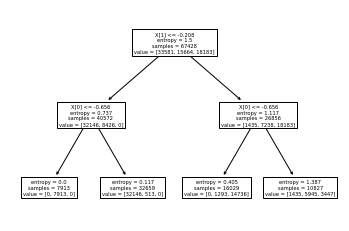

In [19]:
from sklearn.tree import export_graphviz

tree.plot_tree(clf)

## XGBoost

In [20]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

print(xgbc.score(X_train,y_train))

print(xgbc.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9999110161950525
0.9997182304874612


In [25]:
scores = cross_val_score(xgbc,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[0.99933264 0.99918434 0.99977755 0.99940675 0.99977753]
0.9994957612973281
